In [1]:
#mise en place des librairies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# On importe le fichier 
billets= pd.read_csv("billets.csv",sep=';')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
# test de normalité
import scipy.stats as st
#st.shapiro(client_produit.groupby('tranche_age_num').count().reset_index())

In [4]:
columns=billets.drop(columns=['is_genuine'],axis=1).columns

In [5]:
alpha=0.05
for i in columns:
    print([i])
    a,b=st.shapiro(billets[[i]])
    print("statistique",a,'p_value',b)
    if b < alpha:
        print("hypothese nulle peut etre rejeté")
    else:
        print("hypothese nulle ne peut pas etre rejeté")
    

['diagonal']
statistique 0.9986858367919922 p_value 0.323654443025589
hypothese nulle ne peut pas etre rejeté
['height_left']
statistique 0.9979056715965271 p_value 0.051517147570848465
hypothese nulle ne peut pas etre rejeté
['height_right']
statistique 0.9995181560516357 p_value 0.9806451797485352
hypothese nulle ne peut pas etre rejeté
['margin_low']
statistique nan p_value 1.0
hypothese nulle ne peut pas etre rejeté
['margin_up']
statistique 0.996167778968811 p_value 0.000814208120573312
hypothese nulle peut etre rejeté
['length']
statistique 0.9176015853881836 p_value 7.865591300479774e-28
hypothese nulle peut etre rejeté


In [6]:
#toutes les variables sont normalement distribuées car l'hypothèse nulle ne peut pas etre rejetée. 
#En prenant alpha comme 0,05, les valeurs p_valeur calculées à partir du test de Shapiro-Wilk sont supérieur à alpha.

# Analyse Descriptive

In [7]:
# visualiser le contenu et la taille du dataframe
billets.info

<bound method DataFrame.info of       is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      l

In [8]:
# afficher les calcules essentiels 
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [9]:
# faire un premier test de correlation 
billets.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


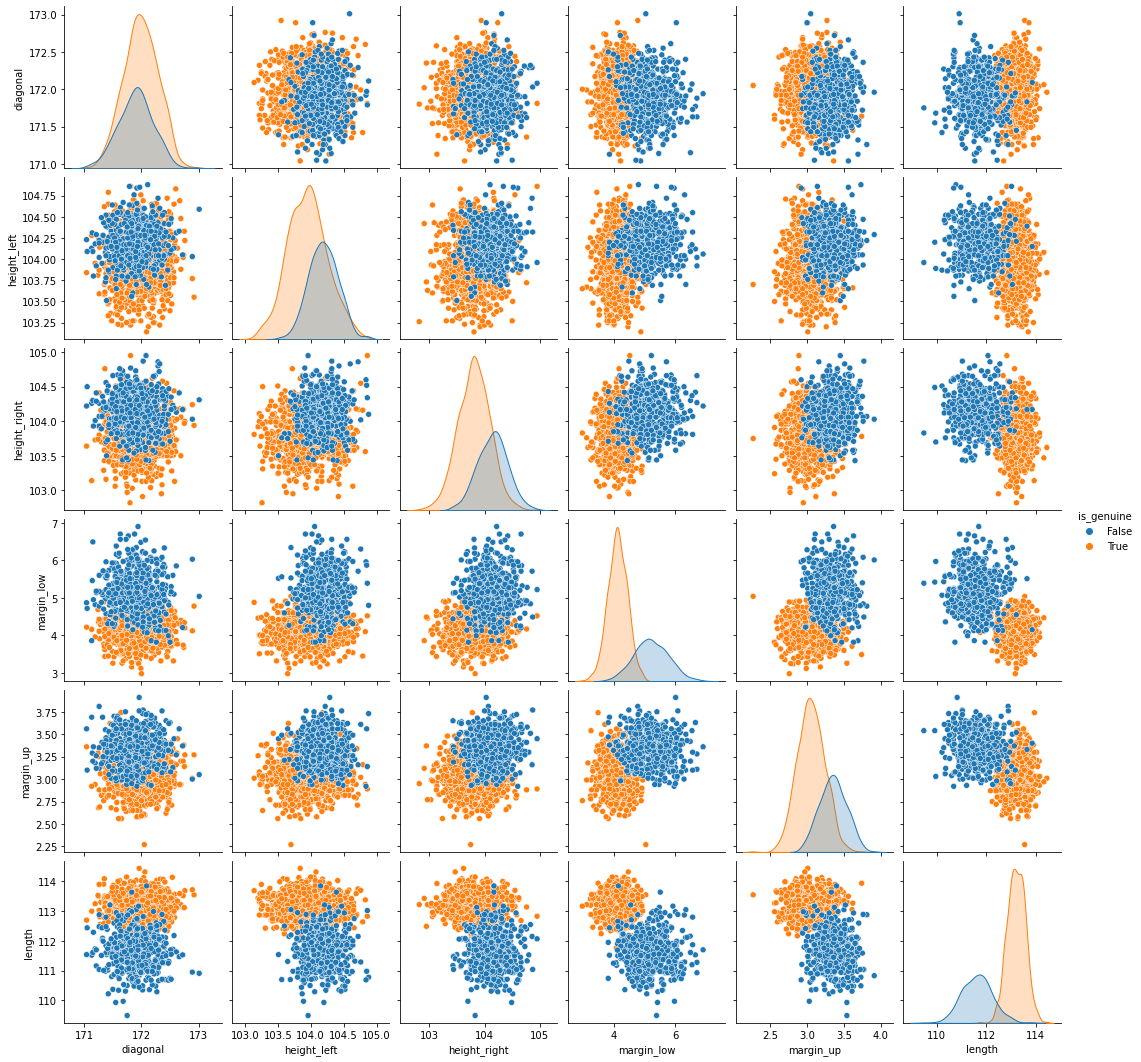

In [10]:
# faire une premiere visualisation des données 
sns.pairplot(billets,hue="is_genuine")

#### Grace à l'analyse desciptive on constate que pour la colonne 'margin-low' il manque des données 

# Determiner les valeurs manquantes par la methode de regression lineaire

In [11]:
# on visualise des données manquantes
df_avec_na= billets.loc[billets.margin_low.isna()]
df_avec_na.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [12]:
# Afin de determiner les NAN on retire ces valeurs du DF  
df_sans_na=billets.loc[~billets.margin_low.isna()]
df_sans_na.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [13]:
# on pratique la regression lineaire sur le df sans NAN
#Certaines des variables obtenues ont des p-valeurs qui sont inférieures au niveau de test de 5 %, 
#ce qui nous indique qu'elles sont bien significatives.
#Certaines autres ne sont pas en dessous de ce seuil.
#On peut donc passer sur une procédure de sélection en retirant les variables non significatives au fur et à mesure
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          4.75e-299
Time:                        22:31:25   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [14]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          2.12e-300
Time:                        22:31:25   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

In [15]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          8.76e-302
Time:                        22:31:25   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

In [16]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          3.63e-303
Time:                        22:31:25   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

In [17]:
# Une fois la regression terminée on constate que les meilleurs variables pour déterminer 'margin_low' sont 'is-genuine',
#  et 'margin_up'
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.24e-304
Time:                        22:31:25   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

### Determiner si le modele est fiable par le score

In [18]:
# faire un test de correlation
df_sans_na.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


In [19]:
# import de la librairie 
from sklearn import linear_model


In [20]:
#selectionner un estimateur et préciser,SI nécessaire, ses hyperparametres.
reg = linear_model.LinearRegression()

In [21]:
# determiner x et y qui sont 2 tableaux
y=df_sans_na['margin_low']
#df.drop(['B', 'C'], axis=1)
x=df_sans_na.drop(columns=['margin_low'],axis=1)
# garder les valeurs de la regression

In [22]:
# entrainer le modele sur les données x,y
reg.fit(x,y)

LinearRegression()

In [23]:
#evaluer le modele
reg.score(x,y)*100

61.6876075567103

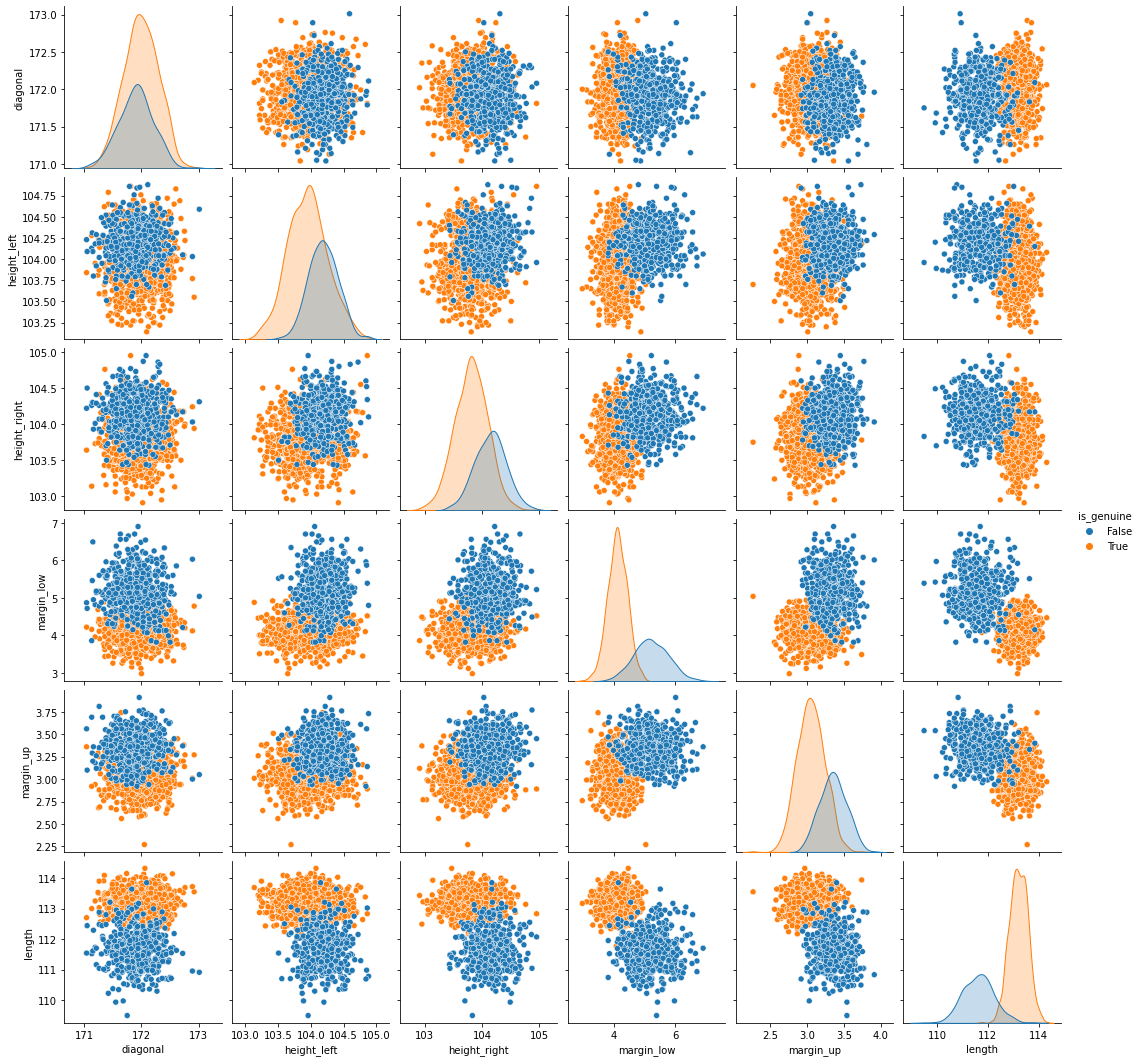

In [24]:
#pairplot.sns sur df_ sans_na pour voir la correlation 
sns.pairplot(df_sans_na,hue='is_genuine')

## Derterminer la solidité du modele

In [25]:
# calcul des leviers 
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.24e-304
Time:                        22:31:35   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

In [26]:
# on réalise le test à un niveau  𝛼=5 % :
alpha = 0.05

In [27]:
# on récupére  𝑛 , le nombre d'individus de l'échantillon, et  𝑝 , le nombre de variables.
n = df_sans_na.shape[0]
p = 3

In [28]:
#on mene des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

In [29]:
#calcule des leviers en sachant le seuil des leviers est de  2∗𝑝𝑛 .
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

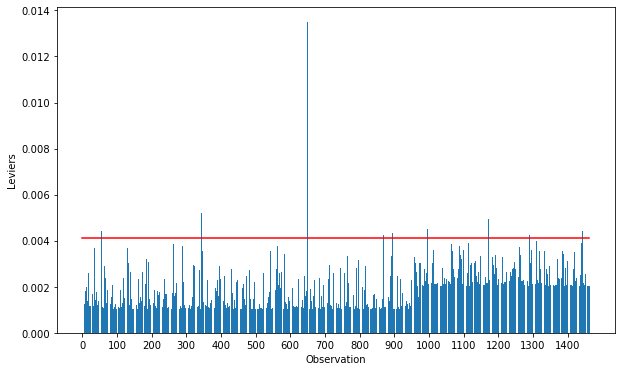

In [30]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

In [31]:
# on sélectionne les points pour lesquels le levier est supérieur au seuil
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
123,124,0.005865
...,...,...
1441,1442,0.005428
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796


In [32]:
# Calculez les résidus studentisés = analyse de la marge d'erreur = epsylon difference d'erreur entre les valeurs réelles et predites
#En pratique, on peut affirmer que tout type d’observation dans un ensemble de données ayant un résidu studentisé supérieur à 3 (valeur absolue) est une valeur aberrante. 
from scipy.stats import t, shapiro
#le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

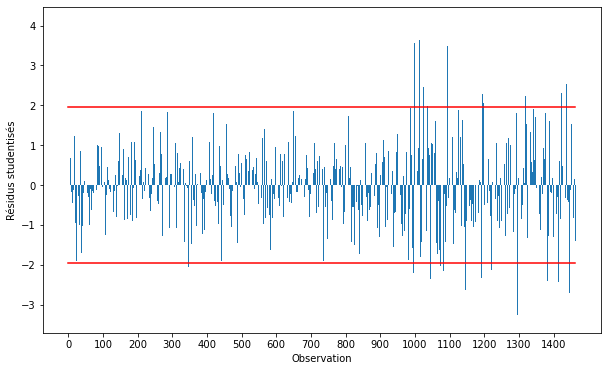

In [33]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [34]:
#Déterminez la distance de Cook
#Elle représente la différence entre les coefficients  calculés 
#et les valeurs qui auraient été obtenues si l'observation correspondante avait été exclue de l'analyse. 
#Toutes les distances doivent être du même ordre de grandeur ; 
#si ce n'est pas le cas,les observations respectives peuvent biaiser l'estimation des coefficients de régression.
influence = reg_multi.get_influence().summary_frame()

In [35]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

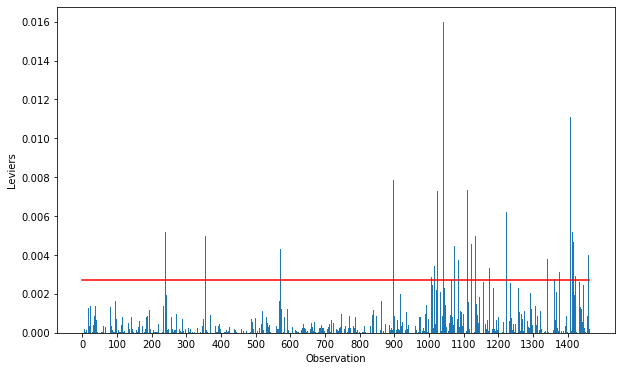

In [36]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [37]:
#Vérifier la colinéarité des variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

In [38]:
#tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité

In [39]:
#Testez l’homoscédasticité= tous les residus ont une variance constante = renforce le test de normalité, le residus doit etre normale et homoscédastique
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


In [40]:
#Testez la normalité des résidus, residus = distance au carré entre le point et la droite de regression,une partie de cette distance est aleatoire et/ou inconnu
# on etudie les residus afin de voir s'ils sont normalement distibués, si c'est le cas on a capté toute l'information qui  n'est pas aleatoire
shapiro(reg_multi.resid)


ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

### On utilise le modele pour determiner les valeurs manquantes 

In [41]:
margin_low= reg_multi.predict(df_avec_na)
print(round(margin_low, 2))

72      4.07
99      4.10
151     4.12
197     4.00
241     4.12
251     4.14
284     4.08
334     4.13
410     4.10
413     4.09
445     4.13
481     4.19
505     4.13
611     4.06
654     4.19
675     4.22
710     4.11
739     4.11
742     4.08
780     4.10
798     4.13
844     4.13
845     4.15
871     4.11
895     4.13
919     4.22
945     4.12
946     4.07
981     4.13
1076    5.25
1121    5.25
1176    5.29
1303    5.31
1315    5.21
1347    5.16
1435    5.17
1438    5.24
dtype: float64


In [42]:
df_avec_na.margin_low

72     NaN
99     NaN
151    NaN
197    NaN
241    NaN
251    NaN
284    NaN
334    NaN
410    NaN
413    NaN
445    NaN
481    NaN
505    NaN
611    NaN
654    NaN
675    NaN
710    NaN
739    NaN
742    NaN
780    NaN
798    NaN
844    NaN
845    NaN
871    NaN
895    NaN
919    NaN
945    NaN
946    NaN
981    NaN
1076   NaN
1121   NaN
1176   NaN
1303   NaN
1315   NaN
1347   NaN
1435   NaN
1438   NaN
Name: margin_low, dtype: float64

In [43]:
df_avec_na.margin_low = round(margin_low,2)

C:\Users\samir\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
df_avec_na.margin_low

72      4.07
99      4.10
151     4.12
197     4.00
241     4.12
251     4.14
284     4.08
334     4.13
410     4.10
413     4.09
445     4.13
481     4.19
505     4.13
611     4.06
654     4.19
675     4.22
710     4.11
739     4.11
742     4.08
780     4.10
798     4.13
844     4.13
845     4.15
871     4.11
895     4.13
919     4.22
945     4.12
946     4.07
981     4.13
1076    5.25
1121    5.25
1176    5.29
1303    5.31
1315    5.21
1347    5.16
1435    5.17
1438    5.24
Name: margin_low, dtype: float64

In [45]:
# on fait une concatenation des 2 dataframe 
billets1=pd.concat([df_avec_na, df_sans_na])
billets1.head(50)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.07,3.25,112.79
99,True,171.93,104.07,104.18,4.10,3.14,113.08
151,True,172.07,103.80,104.38,4.12,3.02,112.93
197,True,171.45,103.66,103.80,4.00,3.62,113.27
241,True,171.83,104.14,104.06,4.12,3.02,112.36
251,True,171.80,103.26,102.82,4.14,2.95,113.22
284,True,171.92,103.83,103.76,4.08,3.23,113.29
334,True,171.85,103.70,103.96,4.13,3.00,113.36
410,True,172.56,103.72,103.51,4.10,3.12,112.95
413,True,172.30,103.66,103.50,4.09,3.16,112.95


In [46]:
# On remet les valeurs dans l'ordre 
billets1.sort_index(inplace=True)

In [47]:
billets1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Prediction de vrais/faux billets 

In [48]:
# is-genuine est la vaviable qui indique si un billet est vrai ou faux 

In [49]:
# on effectue une regression logistique en fonction de toutes les variables explicatives 
# meme principe que la regression lineraire
#Certaines des variables obtenues ont des p-valeurs qui sont inférieures au niveau de test de 5 %, 
#ce qui nous indique qu'elles sont bien significatives.
#Certaines autres ne sont pas en dessous de ce seuil.
#On peut donc passer sur une procédure de sélection en retirant les variables non significatives au fur et à mesure
# dans l'hyperparametre on selectionne 'binomial' car la variable à déterminer n'a que 2 options 'vrai'ou 'faux '
reg_log = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=billets1, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.487
Date:                                       Sun, 04 Dec 2022   Deviance:                       78.974
Time:                                               22:31:42   Pearson chi2:                 2.80e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

In [50]:
reg_log = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length',
                   data=billets1, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1494
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.515
Date:                                       Sun, 04 Dec 2022   Deviance:                       79.030
Time:                                               22:31:42   Pearson chi2:                 2.80e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

In [51]:
# la regression terminée on voit que les variables explicatives significatives sont les suivantes :
#height_right,margin_low,margin_up et length
reg_log = smf.glm('is_genuine~height_right+margin_low+margin_up+length',
                   data=billets1, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1495
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -40.175
Date:                                       Sun, 04 Dec 2022   Deviance:                       80.350
Time:                                               22:31:43   Pearson chi2:                 3.42e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

### Determiner la fiabilité du modele 

In [52]:
# on importe la laibrairie 
from sklearn.linear_model import LogisticRegression


In [53]:
#selectionner un estimateur et préciser,SI nécessaire, ses hyperparametres.
reglog = linear_model.LogisticRegression()

In [54]:
#on determine x et y qui sont 2 tableaux 
y=billets1.is_genuine
x=billets1.drop(columns=['is_genuine','diagonal','height_left'],axis=1)

In [55]:
#on entraine le modele 
reglog.fit(x,y)

LogisticRegression()

In [56]:
#on evalue le modele 
reglog.score(x,y)

0.99

### Determiner si le modele est solide 

In [57]:
# Analyser les resultats 
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1495
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -40.175
Date:                                       Sun, 04 Dec 2022   Deviance:                       80.350
Time:                                               22:31:43   Pearson chi2:                 3.42e+03
No. Iterations:                                           10                                         
Covariance Type:                                   nonrobust                      

In [58]:
# on réalise le test à un niveau  𝛼=5 % :
alpha = 0.05

In [59]:
# on récupére  𝑛 , le nombre d'individus de l'échantillon, et  𝑝 , le nombre de variables.
n1 = billets1.shape[0]
p1 = 5

In [60]:
#on mene des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.
analyses1 = pd.DataFrame({'obs':np.arange(1, n1+1)})
#analyses['obs'].astype('float', inplace=True)

In [61]:
#calcule des leviers en sachant le seuil des leviers est de  2∗𝑝𝑛 .
analyses1['levier'] = reg_log.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

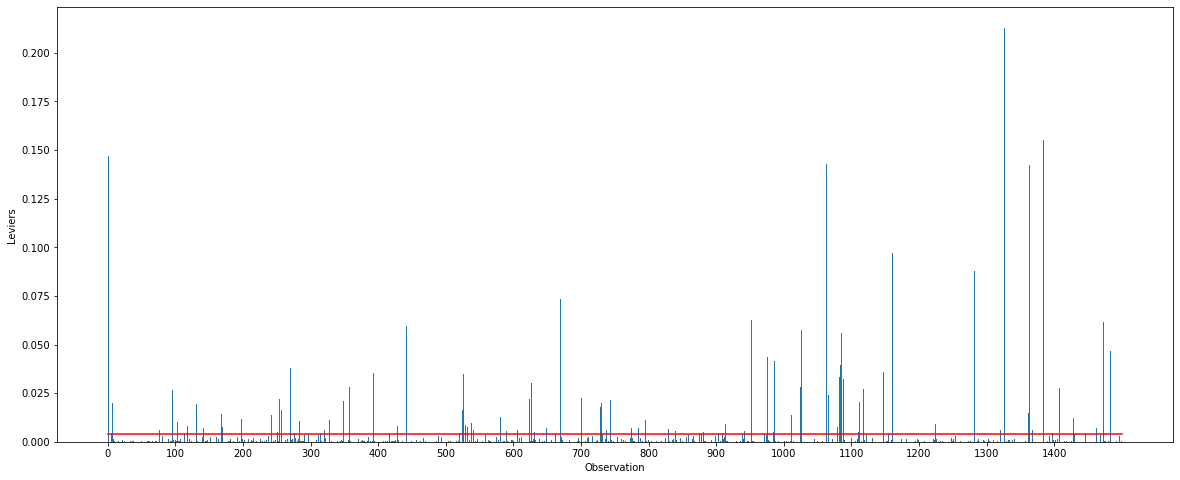

In [62]:
plt.figure(figsize=(20,8))
plt.bar(analyses1['obs'], analyses1['levier'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

In [63]:
# on sélectionne les points pour lesquels le levier est supérieur au seuil
analyses1.loc[analyses1['levier'] > seuil_levier, :]

,obs,levier
0,1,0.146831
4,5,0.062623
6,7,0.019931
17,18,0.016464
38,39,0.051929
...,...,...
1461,1462,0.007010
1472,1473,0.061430
1482,1483,0.046559
1486,1487,0.009671


In [64]:
#determiner distance cook
influence1 = reg_log.get_influence().summary_frame()

In [65]:
analyses1['dcooks'] = influence1['cooks_d']
seuil_dcook = 4/(n-p)

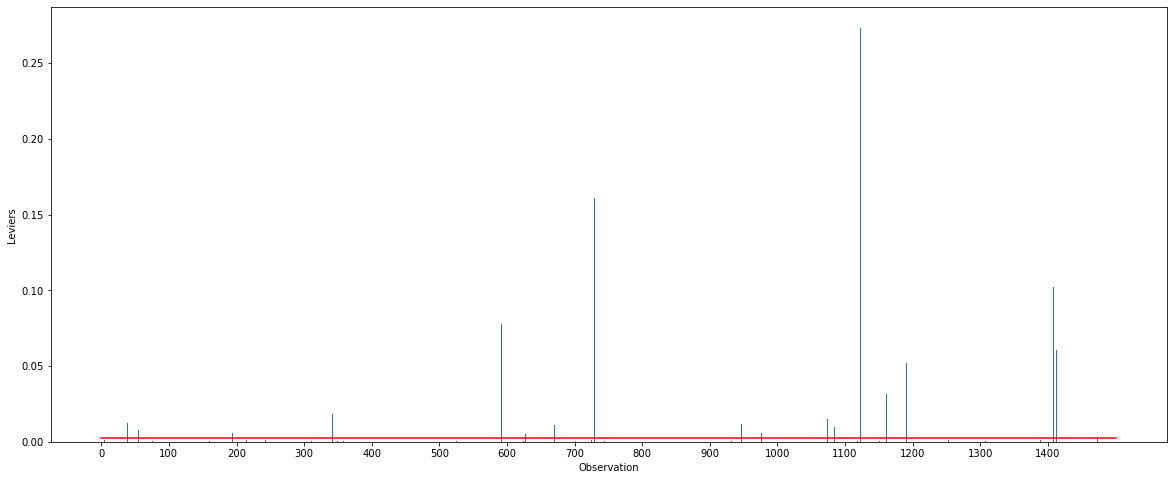

In [66]:
plt.figure(figsize=(20,8))
plt.bar(analyses1['obs'], analyses1['dcooks'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [67]:
#colinearité
variables1 = reg_log.model.exog
[variance_inflation_factor(variables1, i) for i in np.arange(1,variables1.shape[1])]

[1.2456053475197304, 1.889472361747289, 1.4102103250094973, 2.1093743782762973]

In [68]:
billets1.describe

<bound method NDFrame.describe of       is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

     

# Modele de prediction par regression

In [69]:
billet_prod=pd.read_csv('billets_production (1).csv',sep=',')
['faux' if valeur>= 0.5 else 'vrai' for valeur in reg_log.predict(billet_prod.drop(columns='id'))]


['faux', 'faux', 'faux', 'vrai', 'vrai']

### Resultat de la detection par regression logistique sur le dataset

In [70]:
billets1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [71]:
# on creér une fonction afin de déterminer le resultat de la prediction sur le data set et voir son efficacité

def tableau_reg_log(df,cible):
    from sklearn.linear_model import LogisticRegression
    reglog = linear_model.LogisticRegression()
    y=billets1[cible]
    x=billets1.drop(columns=[cible],axis=1).values
    reglog.fit(x,y)
    print('le score est',reglog.score(x,y))
    billets1['prediction']=reglog.predict(x)
    vv=billets1[billets1[cible]==True][billets1.prediction==True].shape[0]
    vf=billets1[billets1[cible]==True][billets1.prediction==False].shape[0]
    ff=billets1[billets1[cible]==False][billets1.prediction==False].shape[0]
    fv=billets1[billets1[cible]==False][billets1.prediction==True].shape[0]
    return pd.DataFrame({'Vrai':[vv,fv],'Faux':[vf,ff]},index=['billets vrais','billets faux'])
    

In [72]:
# on affiche le resultat 
#nombre de vrais billets :vrais
#nombre de vrais billets: faux
#nombre de faux billets: vrais
#nombre de faux billets: faux 
#on peut se représenter la marge d'erreure
tableau_reg_log(billets1.copy(),'is_genuine')

le score est 0.9906666666666667


C:\Users\samir\AppData\Local\Temp/ipykernel_50456/2934826017.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vv=billets1[billets1[cible]==True][billets1.prediction==True].shape[0]
C:\Users\samir\AppData\Local\Temp/ipykernel_50456/2934826017.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vf=billets1[billets1[cible]==True][billets1.prediction==False].shape[0]
C:\Users\samir\AppData\Local\Temp/ipykernel_50456/2934826017.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ff=billets1[billets1[cible]==False][billets1.prediction==False].shape[0]
C:\Users\samir\AppData\Local\Temp/ipykernel_50456/2934826017.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fv=billets1[billets1[cible]==False][billets1.prediction==True].shape[0]


,Vrai,Faux
billets vrais,995,5
billets faux,9,491


In [73]:
billets1.drop(columns='prediction',inplace=True)
billets1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# METHODE DE DETECTION PAR CLUSTERING

### Determiner le nombre de cluster

In [74]:
# mise en place des librairies  
from sklearn import datasets
from sklearn.cluster import KMeans

In [75]:
# on convertie les données en format numpy array
X = billets1.drop(columns='is_genuine').values
X[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [76]:
X.shape

(1500, 6)

In [77]:
# on defini une liste vide pour stocker nos inerties 
inertia_list = [ ]

In [78]:
# on defini le nombre de cluster que l'on veut tester
#L'algorithme du k-means converge rapidement : il n'est pas rare qu'il atteigne la convergence au bout de 10 itérations.
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [79]:
# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    inertia_list.append(kmeans.inertia_)

In [80]:
inertia_list

[2307.948166733333,
 969.5353449336427,
 860.1851393206423,
 771.8524820457011,
 710.215240225137,
 666.5259278419372,
 629.3578396084635,
 594.448667813677,
 573.1943149626909,
 548.7948972906446]

In [81]:
len(inertia_list)

10

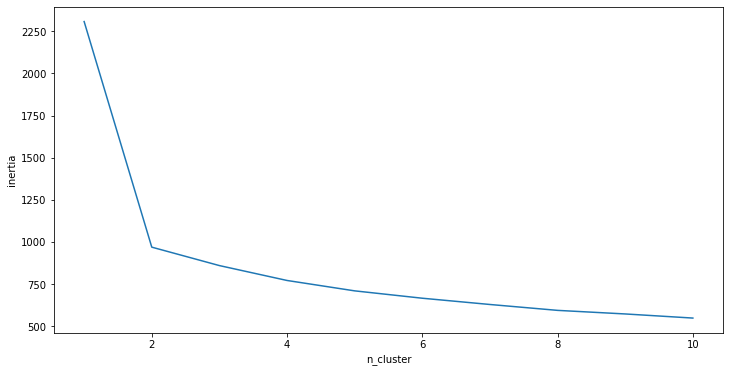

In [82]:
#On affiche en "x" le nombre de clusters,la variable k_list et en "y" la liste des inerties intraclasses,la variable inertia  :
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list)

In [83]:
#on regarde le graphique pour constater la "cassure" dans la courbe: n_clusters=2

In [84]:
X[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [85]:
#on ré-entraine un estimateur:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

In [86]:
# voici les clusters
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
#on remplace les numeros des clusters par des lettre 
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [88]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

In [89]:
# on ajoute nos clusters à notre dataframe 
df_clusters=billets1.copy()
df_clusters['clusters']=labels
df_clusters.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clusters
0,True,171.81,104.86,104.95,4.52,2.89,112.83,a
1,True,171.46,103.36,103.66,3.77,2.99,113.09,a
2,True,172.69,104.48,103.50,4.40,2.94,113.16,a
3,True,171.36,103.91,103.94,3.62,3.01,113.51,a
4,True,171.73,104.28,103.46,4.04,3.48,112.54,a


### Resultat de la detection par clustering sur le dataset 

In [90]:
# on compte le nombre de is-genuine qui appartiennent au cluster 'a'
df_clusters[df_clusters.clusters=='a'].is_genuine.value_counts()
# le resultat indique que le cluster 'a'correspond bien aux billets qui sont vrais 

True     998
False     19
Name: is_genuine, dtype: int64

In [91]:
#on compte le nombre de is-genuine qui appartiennent au cluster 'b' et du coup on deduit que le cluster 'b' correspond aux billets faux 
df_clusters[df_clusters.clusters=='b'].is_genuine.value_counts()

False    481
True       2
Name: is_genuine, dtype: int64

In [92]:
# on calcule le nombre de billets vrais : vrai
# on calcule le nombre de billets vrais : faux
# on calcule le nombre de billets faux : vrais
#on calcule le nombre de billets faux : faux
av=df_clusters[df_clusters.clusters=='a'].is_genuine.value_counts()[1]
af=df_clusters[df_clusters.clusters=='a'].is_genuine.value_counts()[0]
bv=df_clusters[df_clusters.clusters=='b'].is_genuine.value_counts()[1]
bf=df_clusters[df_clusters.clusters=='b'].is_genuine.value_counts()[0]
av,af,bv,bf

(998, 19, 2, 481)

In [93]:
# on regroupe le resultat dans un dataframe pour synthetiser et visualiser le resultat de la prediction et voir sa marge d'erreur
df_c=pd.DataFrame({'True':[av,bv],'Faux':[af,bf]}, index=['classe A','classe B'])
df_c

,True,Faux
classe A,998,19
classe B,2,481


In [94]:
# cela peut etre realisé par la maniere d'une fonction 
def tableau_kmeans(X,nbre_de_cluster,df_clusters): 
    kmeans = KMeans(n_clusters=nbre_de_cluster,random_state=1)
    kmeans.fit(X)
    df_clusters['clusters']=kmeans.labels_
    df_clusters['clusters'].replace({'a':0,'b':1},inplace=True)
    av=df_clusters[df_clusters.clusters==0].is_genuine.value_counts()[1]
    af=df_clusters[df_clusters.clusters==0].is_genuine.value_counts()[0]
    bv=df_clusters[df_clusters.clusters==1].is_genuine.value_counts()[1]
    bf=df_clusters[df_clusters.clusters==1].is_genuine.value_counts()[0]
    df_c=pd.DataFrame({'Vrai':[av,bv],'Faux':[af,bf]}, index=['classe A','classe B'])
    return df_c
   

In [95]:
tableau_kmeans(X,2,df_clusters.copy())

,Vrai,Faux
classe A,998,19
classe B,2,481


In [96]:
df_clusters.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clusters
0,True,171.81,104.86,104.95,4.52,2.89,112.83,a
1,True,171.46,103.36,103.66,3.77,2.99,113.09,a
2,True,172.69,104.48,103.50,4.40,2.94,113.16,a
3,True,171.36,103.91,103.94,3.62,3.01,113.51,a
4,True,171.73,104.28,103.46,4.04,3.48,112.54,a


In [97]:
#taux de reussite du clustering
#taux de reussite du cluster 'a'
df_clusters[df_clusters.clusters=='a'].is_genuine.value_counts()[1]*100/1000

99.8

In [98]:
#taux de reussite du cluster'b'
df_clusters[df_clusters.clusters=='b'].is_genuine.value_counts()[0]*100/500

96.2

In [99]:
#score global du cluster
score_global= (df_clusters[df_clusters.clusters=='a'].is_genuine.value_counts()[1]*100/1000+df_clusters[df_clusters.clusters=='b'].is_genuine.value_counts()[0]*100/500)/2
score_global

98.0

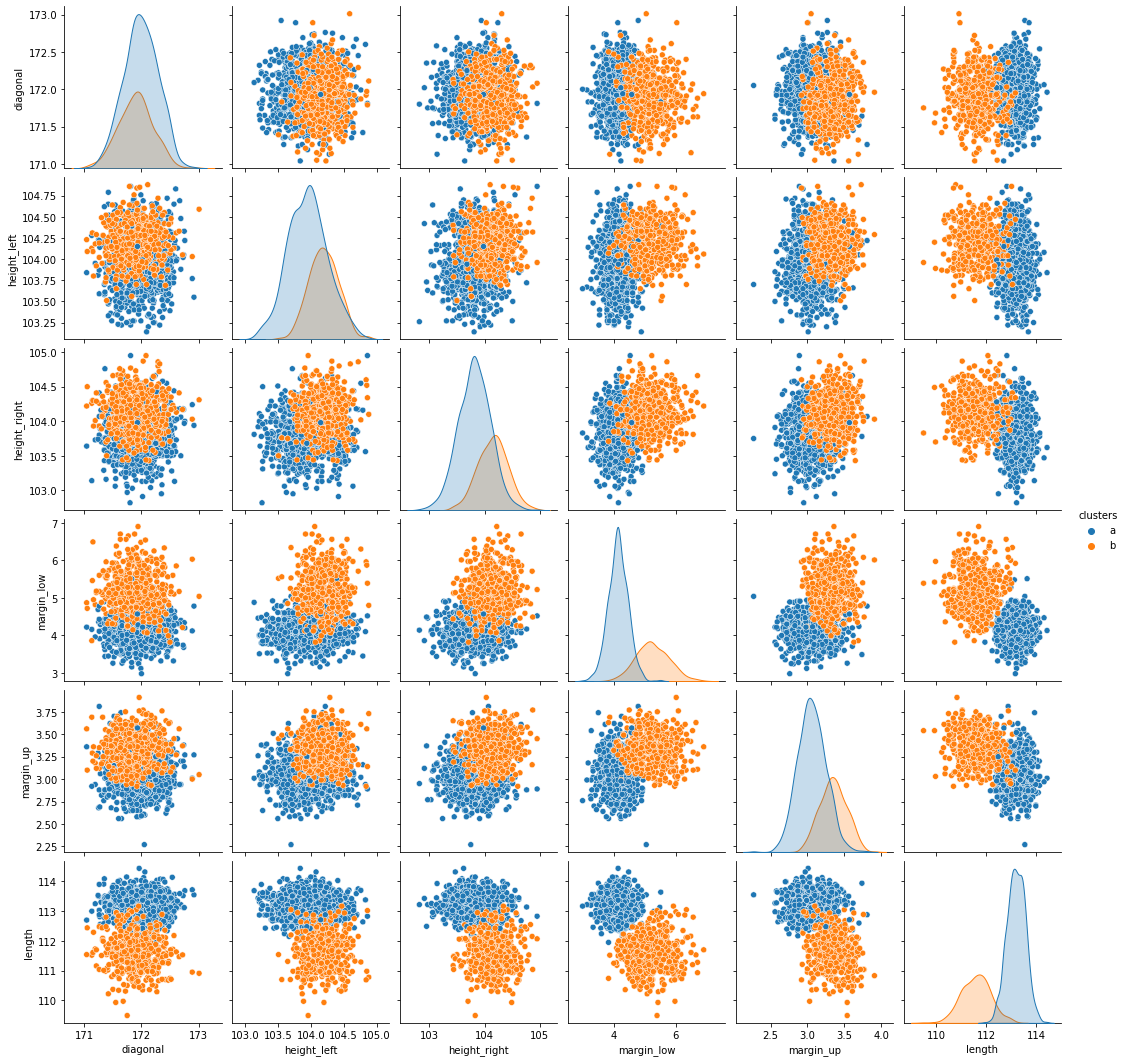

In [100]:
sns.pairplot(df_clusters.drop(columns='is_genuine'), hue="clusters")

# modele de prediction par clustering 

In [101]:
billet_prod=pd.read_csv('billets_production (1).csv',sep=',')
['faux' if valeur== 1 else 'vrai' for valeur in kmeans.predict(billet_prod.drop(columns='id'))]


['faux', 'faux', 'faux', 'vrai', 'vrai']